# Второе задание по вычислительной математике. Численные методы решения гиперолических систем уравнений. Уравнение переноса.

### выполнила Кондрашина Анна, 7111 группа. Вариант 7

## Постановка задачи:
Рассматривается система линейных гиперболических уравнений:
$$ \frac{\partial \textbf{u}}{\partial t} + \textbf{A} \frac{\partial \textbf{u}}{\partial x}= \textbf{b(x)}$$
$$ 0 < x <1$$
$$0 < t <1$$ 
$$A = \begin{pmatrix}
    -\frac{5}{8} & \frac{1}{2} & -\frac{47}{8}\\
    -\frac{1}{4} & 0 & -\frac{11}{4}\\
    -\frac{41}{8} & \frac{19}{2} & -\frac{37}{8}
\end{pmatrix}$$
$$\textbf{b} = \begin{pmatrix}
0 & 0 & 0
\end{pmatrix}$$
Необходимо построить численное решение задачи при помощи схемы П. Ларкса и полностью симметричной разностной схемы. Для каждой схемы выписать ПДП и определить, диссипативная или дисперсионная ошибка преобладает. Определить, монотонна ли схема, оценить апостериорный порядок сходимости каждой схемы.

## Проанализируем систему

Перед тем, как приступать к построению численных решений нашей системы, преобразуем ее. Для того, чтобы перейти к системе инвариантов Риммана, найдем собственные векторы матриццы, эрмитовосопряженной с матрицей А ( т.н. "левая система векторов"). Так как мы работаем с матрицей вещественных чисел, матрицу эрмитово сопряженную с данной, можно получить транспонированием. Получим:
$$\lambda_1 = -5, e_1 = (1 , -2, 1 )^{\textbf{T}}$$
$$\lambda_2 = 2, e_2 = (-3, 4, 1)^{\textbf{T}}$$
$$ \lambda_3 = -1, e_3 = (5, -12, 1)^{\textbf{T}}$$
Теперь мы можем перейти к инвариантам Римана:
$$ R_1 = u+\frac{1}{2} +r$$
$$ R_2 = -5u-2v+r$$
$$ R_3 = 3u+2v+r$$
Тогда система примет вид:
$$\frac{\partial R_1}{\partial t} - 5\frac{\partial R_1}{\partial x} = 0$$
$$\frac{\partial R_2}{\partial t} + 2\frac{\partial R_2}{\partial x} = 0$$
$$\frac{\partial R_3}{\partial t} - 1\frac{\partial R_3}{\partial x} = 0$$
А начальные условия станут: 
$$ \textbf{R}(0, x) =\begin{pmatrix}
    sin(\pi x) - 2 cos(\pi x) +1 +sin(\pi x)\\
    -3 sin(\pi x) +4 cos(\pi x) +1 +sin(\pi x)\\
    5 sin(\pi x) -12 cos(\pi x) + 1 + sin(\pi x)
\end{pmatrix}$$

Таким образом, наша система уравнений распалась на три независимых компанента. ЧТобы найти решения исходной функции, найдем численное решение инвариантов Римана, и уже по ним найдем решения системы. 

## Постановка граничных условий 
Для того чтобы использовать разностные схемы поиска инвариантов Римана, нам необходимо знать значение функции на границах расчетной области (при х=0 и х=1). Для этого используем характеристики. Мы исследуем однородную систему, поэтому инварианты Римана будут постояными вдоль одного из семейств характеристик(а именно, вдоль характеристики $x+\lambda t = const$). Но только значений инвариантов, приносимых характеристиками, недостаточно, поэтому необхоимо задать еще и граничные условия. К левой границе (х = 0) характеристиками от начальных условий приходят две характеристики, поэтому необходимо задать только одно дополнительное граничное условие. К правой границе от начальных условий значения переносятся только одной характеристикой, поэтому необходимо задать два граничных условия. Положим: 
$$ u_3(t, 0) = cos(\pi t)$$
$$ u_3(t, 1) = cos(\pi t)$$
$$ u_2(t, 1) = cos(\pi (1+t)) $$

##  Метод Лакса 

Для начала запришем, собственно, схему(схема приведена для модельного уравнения): 
$$\frac{u_m^{n+1}-0.5(u^n_{m+1}+u^n_{m-1})}{\tau}+a\frac{u^n_{m+1}-u^n_m}{2h} =0$$
Первое дифференциальное приблежение (ПДП) для этой схемы будет иметь вид:
$$\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = (\frac{h^2}{2\tau} - \frac{\tau a^2}{2})\frac{\partial^2 u}{\partial x^2} + O(h^2)$$
Коэффициент схемной вязкости можно переписать как:
$$\gamma = (\frac{h^2}{2\tau}-\frac{\tau a^2}{2}) = \frac{h^2}{2\tau}(1-\sigma^2)$$
Откуда видно, что:

1) Схема обладает вторым порядком апроксимации по координате, первым по времени;

2) Схема становится недиссипативной, при числе куранта равном единицы;

3) Схема не чувствительна к направлению потока;

4) При числе Куранта, меньшем единицы, схемная вязкость оказывается стабилизирующее воздействие, то есть схема устойчива при числе Куранта, меньшем еденицы;

Подействуем на ПДП преобразованием Фурье, получим:
$$\widetilde{u_t}+ a(-i\omega)\widetilde{u_x} =  \widetilde{u}(\frac{ah^2}{\tau}-\frac{\tau a^2}{2})$$

Откуда можно сделать вывод, что в схеме преобладает диссипативная погрешеность.

### Монотонность схемы
Как уже ранее отмечалось, схема иммет второй порядок апроксимации по координате и первый по времени, а значит, согласно теореме Годунова, не является монотонной. 

Однако проверим монотонность схемы еще раз.

Условие монотонности по Фридрихсу: 

Двухслойная разностная схема для одноролного уравнения 

$$ u^{n+1}_m = \sum_k = \alpha_k (\tau, h)u_{m+k}^n$$

монотонна, если 
$$\alpha_k>0$$

Преобразуя схему, выписанную выше, получим:

$$u_m^{n+1} = (0,5-\frac{a\tau}{2h})u_{m+1}^n+(0,5+\frac{a\tau}{2h})u_{m-1}^n$$

Условие устойчивости схемы - $\frac{\tau a}{h} - меньше единицы. Как видно из выражения выше, это же условие является условием монотонности схемы. То есть, схема монотонна по Фридрихсу, если она устойчива. 

Условие монотонности по Годунову: из $u_{m+1}^n-u_m^n > 0$ следует, что $u_{m+1}^{n+1}-u_m^{n+1}>0$. Покажем, что это условие не выполняется для схемы Ларкса. Запишем выражение для $u^{n+1}_m$ и $u^{n+1}_{m+1}$: 
$$u^{n+1}_m = 0,5(u^n_{m+1}+u^n_{m-1})+\frac{a\tau}{2h}(u^n_{m+1}-u^n_{m-1})$$
$$u^{n+1}_{m+1} = 0,5(u^n_{m+2}+u^n_{m})+\frac{a\tau}{2h}(u^n_{m+2}-u^n_{m})$$

Вычтем одно из другого: 
$$u^{n+1}_{m+1}-u^{n+1}_{m} = 0,5(u^{n}_{m+2}+u^{n}_{m}-u^{n}_{m+1}-u^{n}_{m-1})+\frac{a\tau}{2h}(u^{n}_{m+2}-u^{n}_{m+1}-u^{n}_{m}+u^{n}_{m-1})$$
Примем, что $u_{m+1}^n-u_m^n > 0$. Тогда $u_{m+2}^n-u_{m+1}^n > 0$, $u_{m}^n-u_{m-1}^n > 0$. Тогда: 

$$u^{n+1}_{m+1}-u^{n+1}_{m} = 0,5((u^{n}_{m+2}-u^{n}_{m+1})+(u^{n}_{m}-u^{n}_{m-1}))+\frac{a\tau}{2h}((u^{n}_{m+2}-u^{n}_{m+1})-(u^{n}_{m}-u^{n}_{m-1}))$$
Все выражения, записанные в скобках положительны. Перед первыми тремя скобками знак "+", но перед последней - "-", а значит нельзя однозначно сказать, что левая часть больше нуля. Таким образом, условие Годунова выполняется не всегда и схема не является монотонной по Годунову.

Теперь построим решения, используя разностную схему Лакса

In [1]:
from PIL import Image
im1 = Image.open('FirstU.png')
im2 = Image.open('FirstV.png')
im3 = Image.open('FirstR.png')

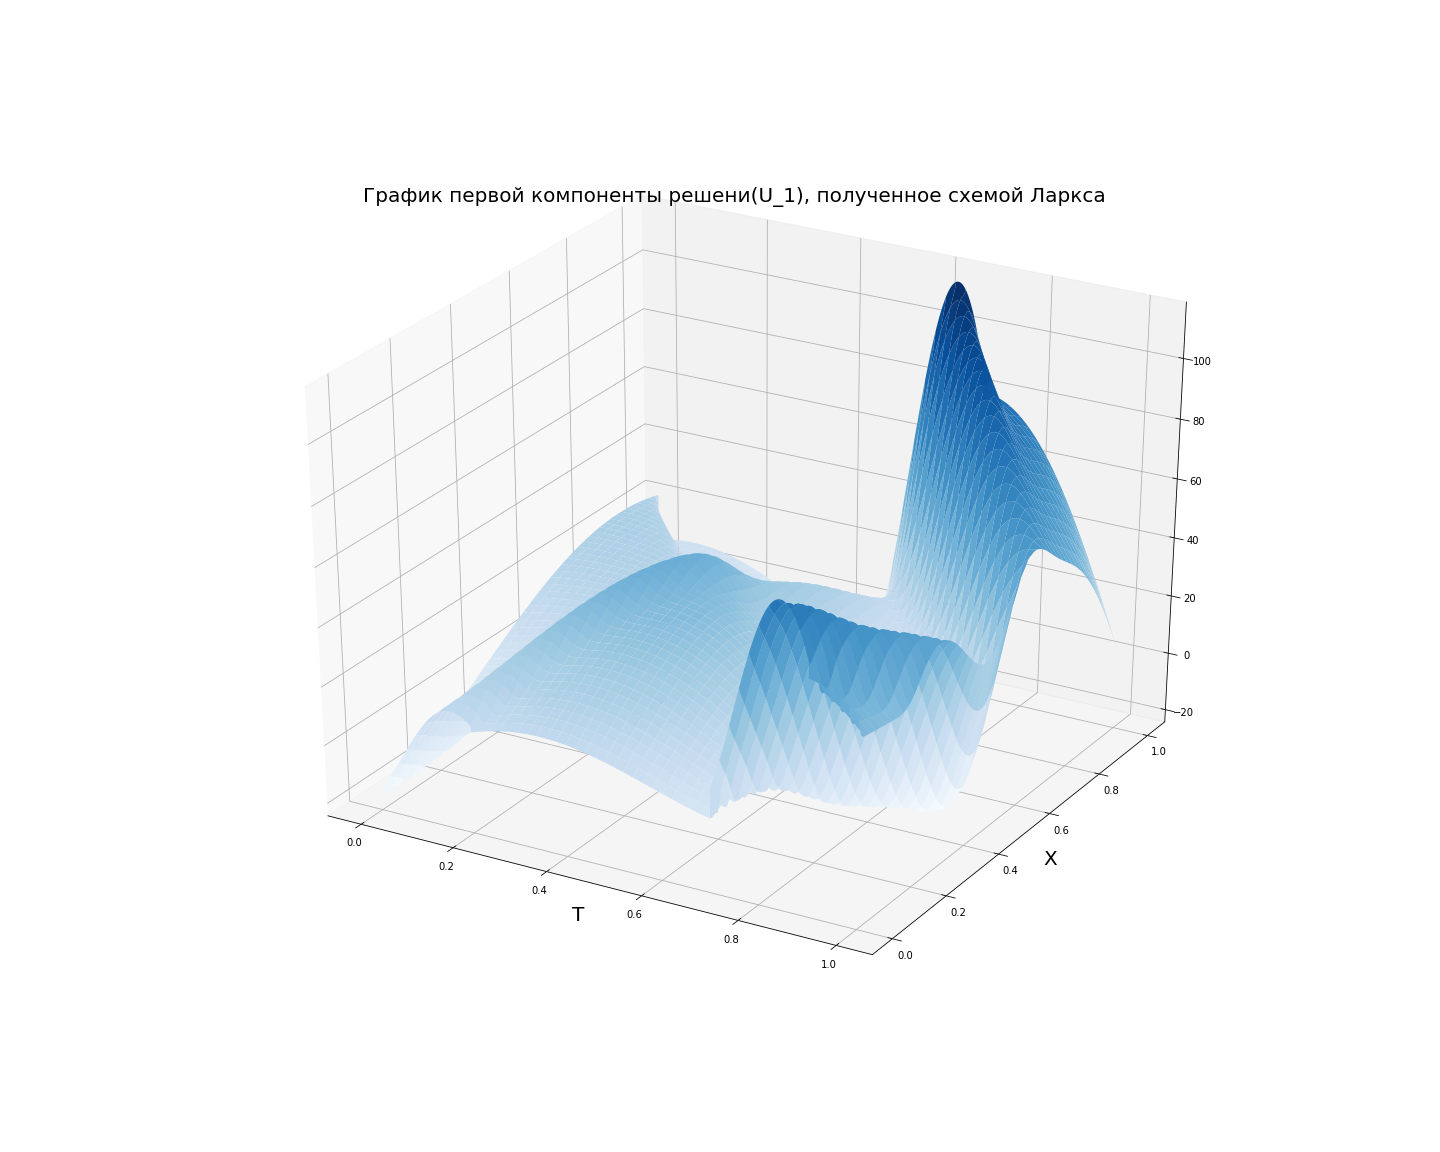

In [2]:
im1

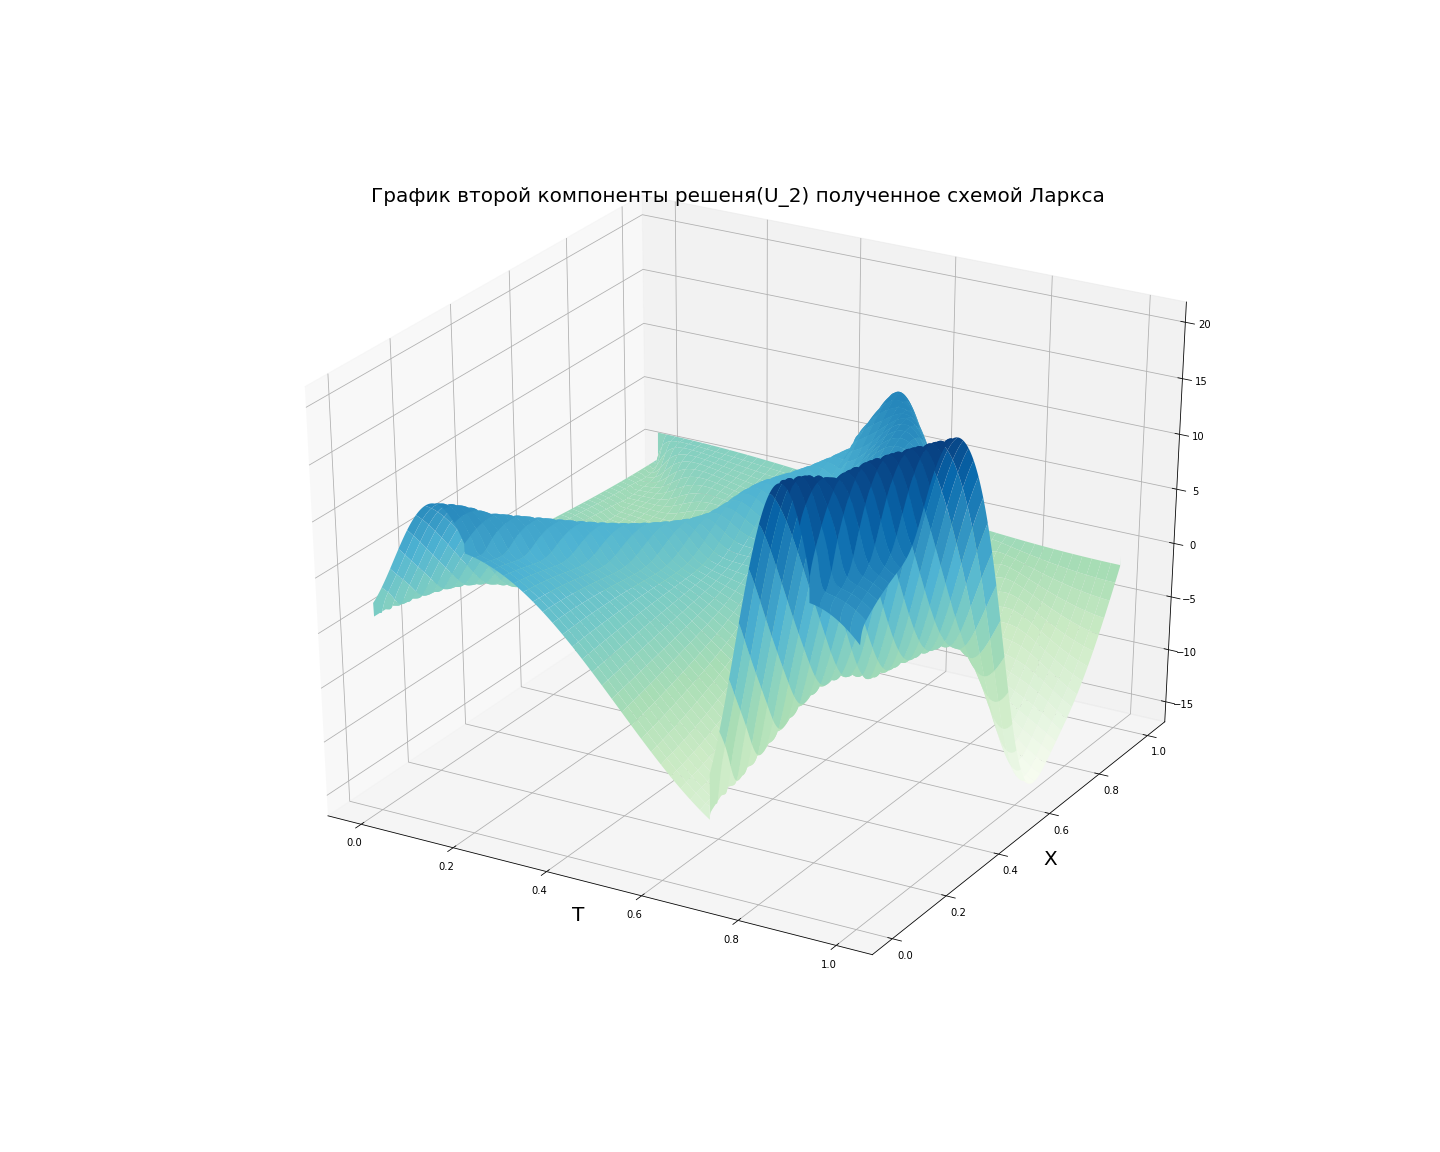

In [3]:
im2

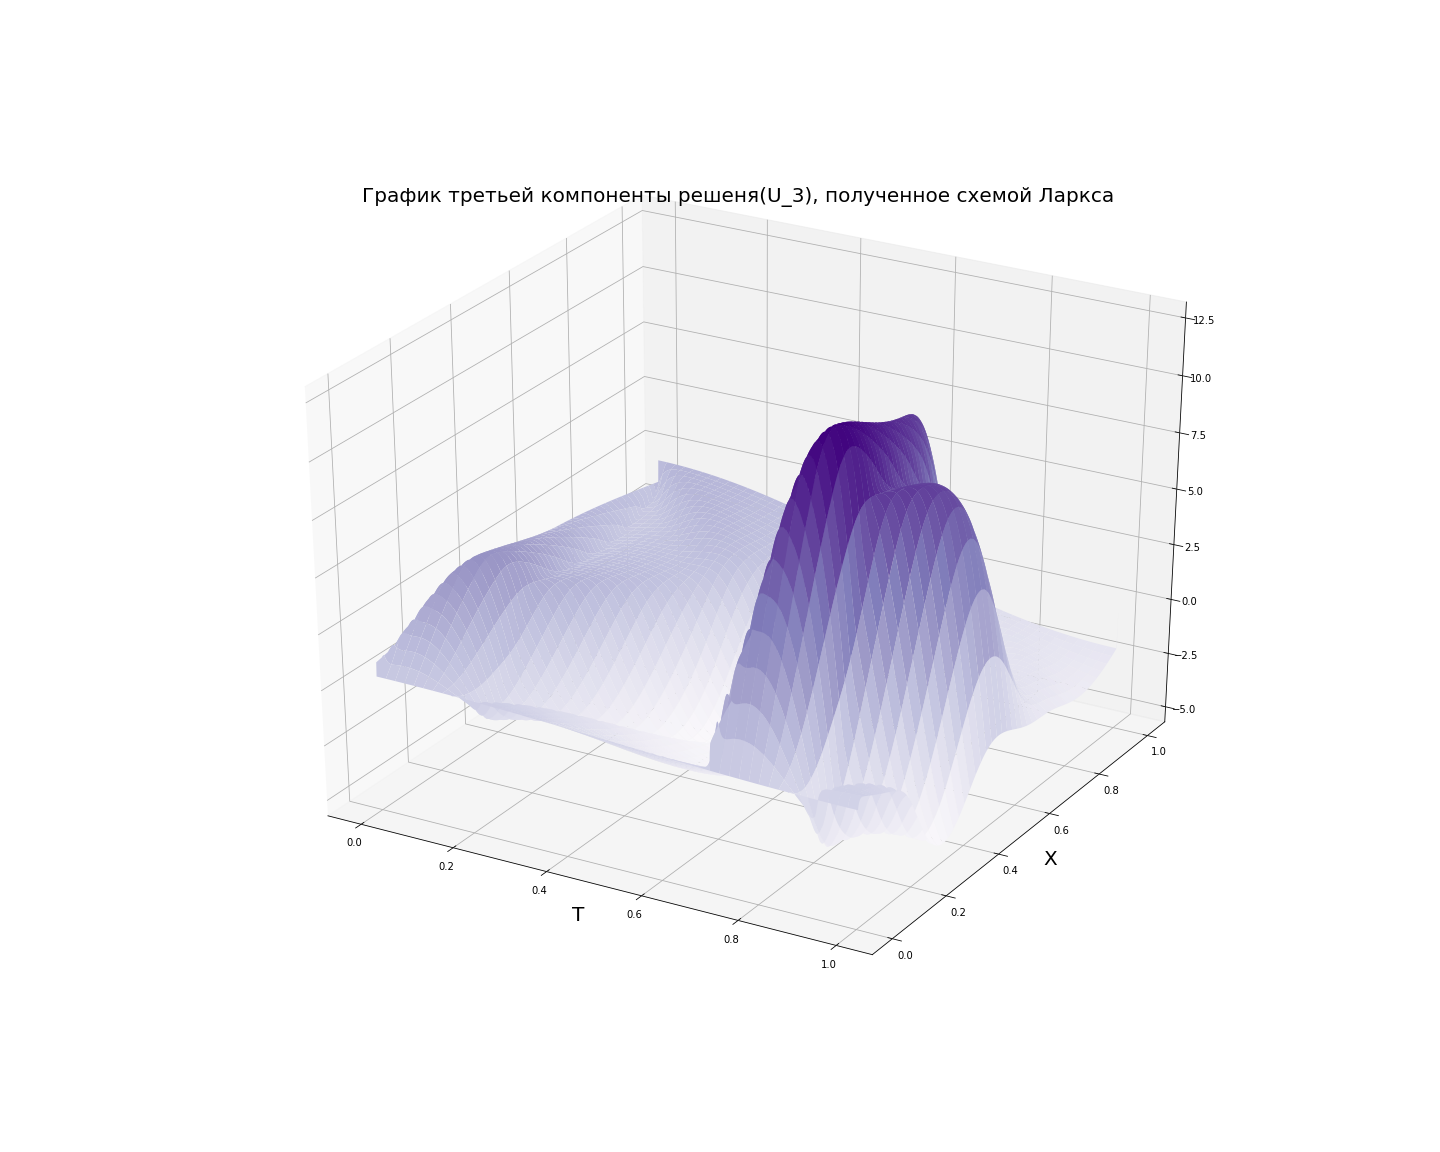

In [4]:
im3

## Полностью симметричная разностная схема (схема бегущего счетчика) 
Как и для схемы выше, все обозначения будем приводить для модельного уравнения. Схема будет иметь вид:
$$\frac{(u^{n+1}_{m+1}- u^{n+1}_m) + (u^n_{m+1}-u^{n}_{m})}{2\tau}+a\frac{(u^{n+1}_{m+1} - u^n_{m+1}) + (u_m^{n+1} - u_m^n)}{2h}=0$$

Запишем ПДП(П) для этой схемы: 
$$u_t ' + a u_x ' = u_{xxx} ''' \frac{a^3}{6}(\tau^2+h^2)$$
Из ПДП видно, что:

1) Схема имеет второй порядок аппроксимации по времени и по координате;

2) Схема безусловно устойчива;

3) Преобладает дисперсионная погрешность;

### Монотонность 

По теореме Годунова, не существует линейных монотонных схем, порядком апроксимации выше первого, а это значит, что схема бегущего счетчика не будет монотонной. 

Однако попробуем доказать это. Еще раз запишем схему вычисления:

$$\frac{u_{m+1}^{n+1}-u_{m}^{n+1}}{2\tau} +\frac{u_{m+1}^{n}-u_{m}^{n}}{2\tau}+\frac{a(u_{m+1}^{n+1}-u_{m+1}^{n})}{2h}+\frac{a(u_{m}^{n+1}-u_{m}^{n})}{2h} = 0$$

Принимая условие ($u_{m+1}^n-u_m^n > 0$), второе, третье и четвертое слагаемое окажутся положительными, а значит первое обязано быть отрицательным. То естьусловие Годунова не выполняется, а значит, схема не является монотонной по Годунову

In [7]:
im1 = Image.open('secondU.png')
im2 = Image.open('secondV.png')
im3 = Image.open('secondR.png')

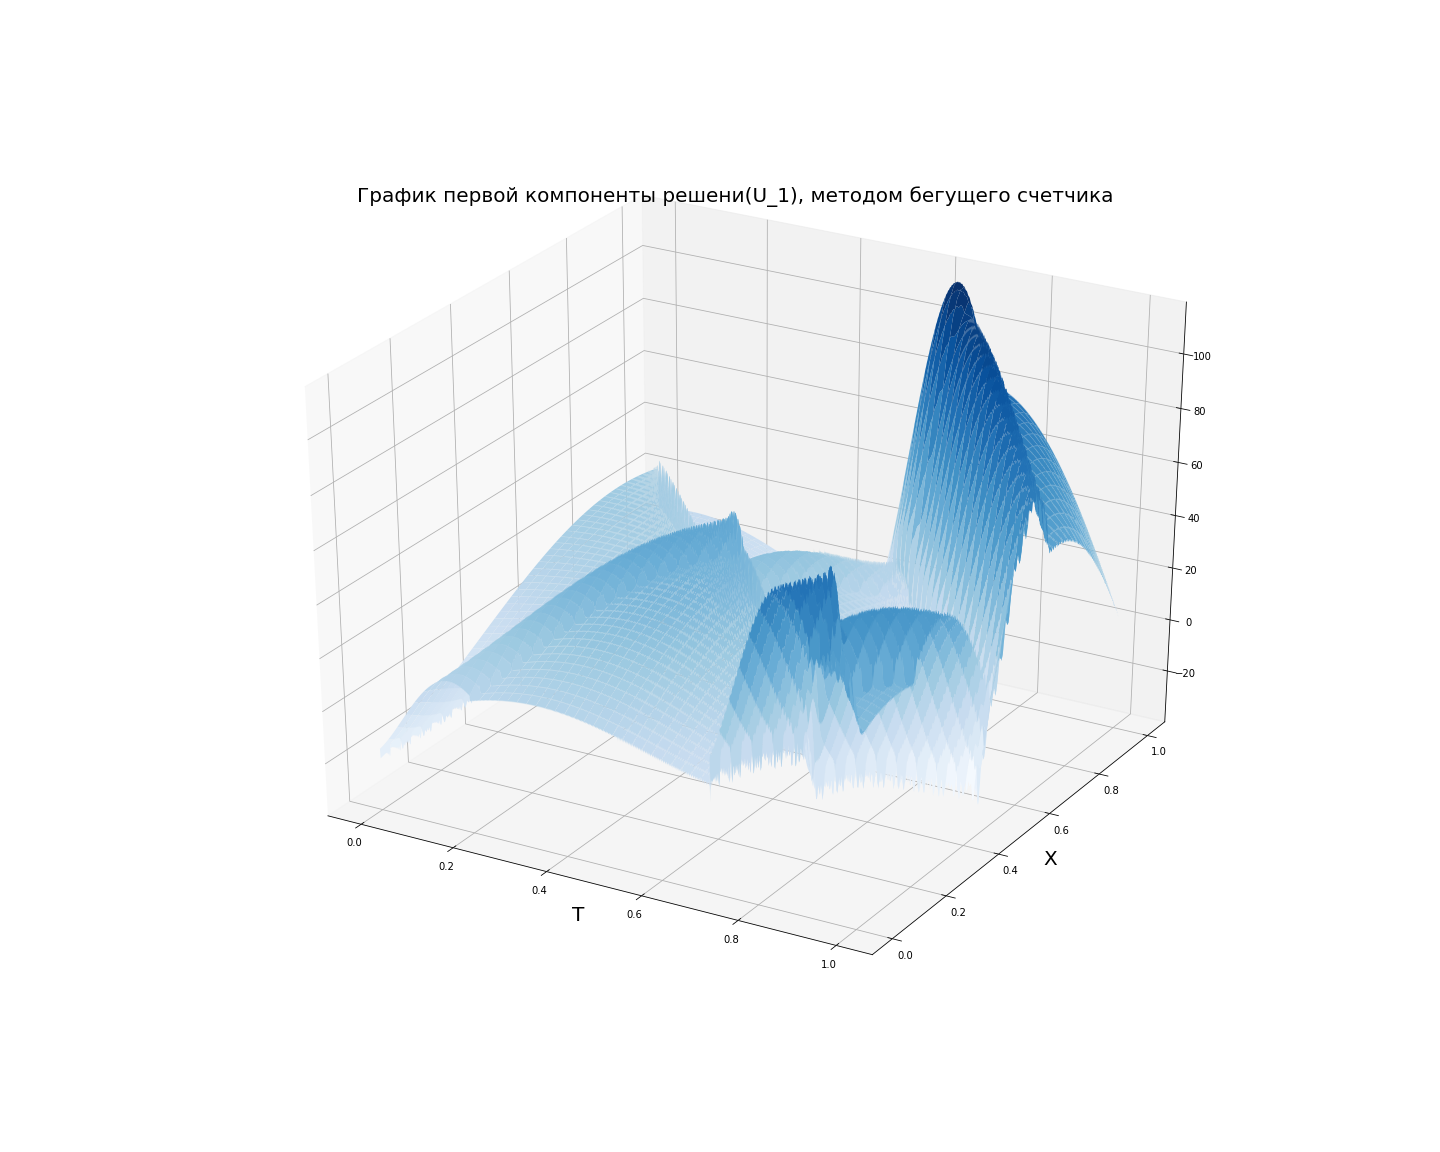

In [8]:
im1

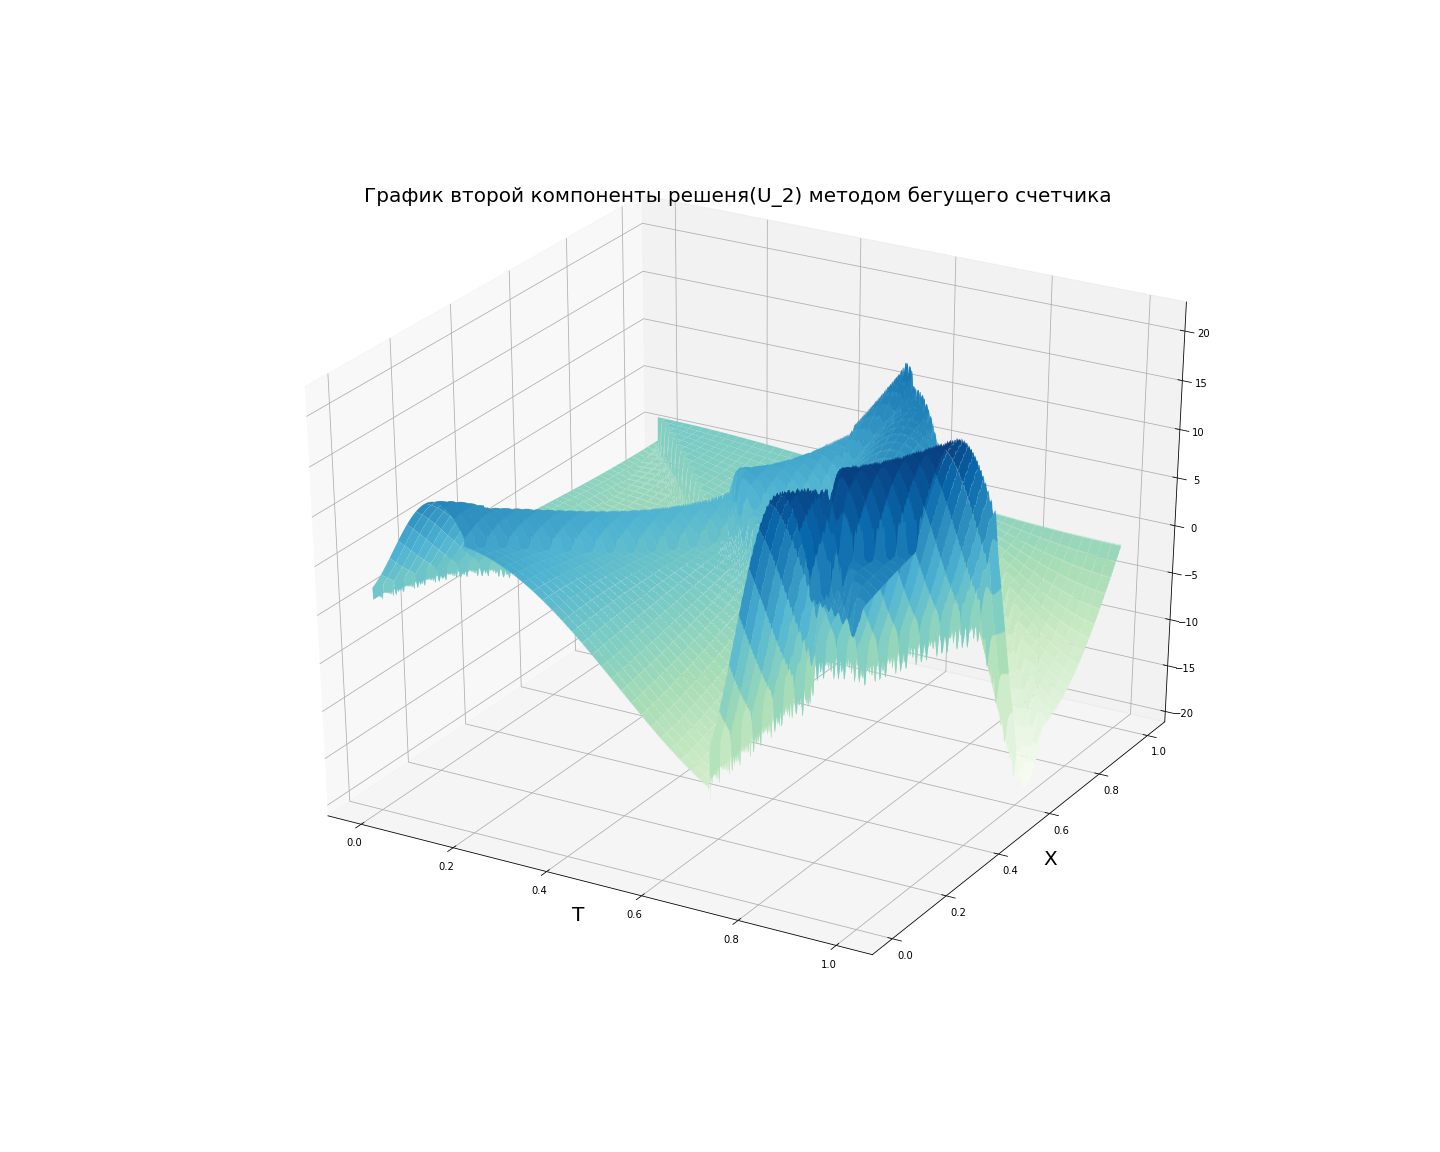

In [9]:
im2

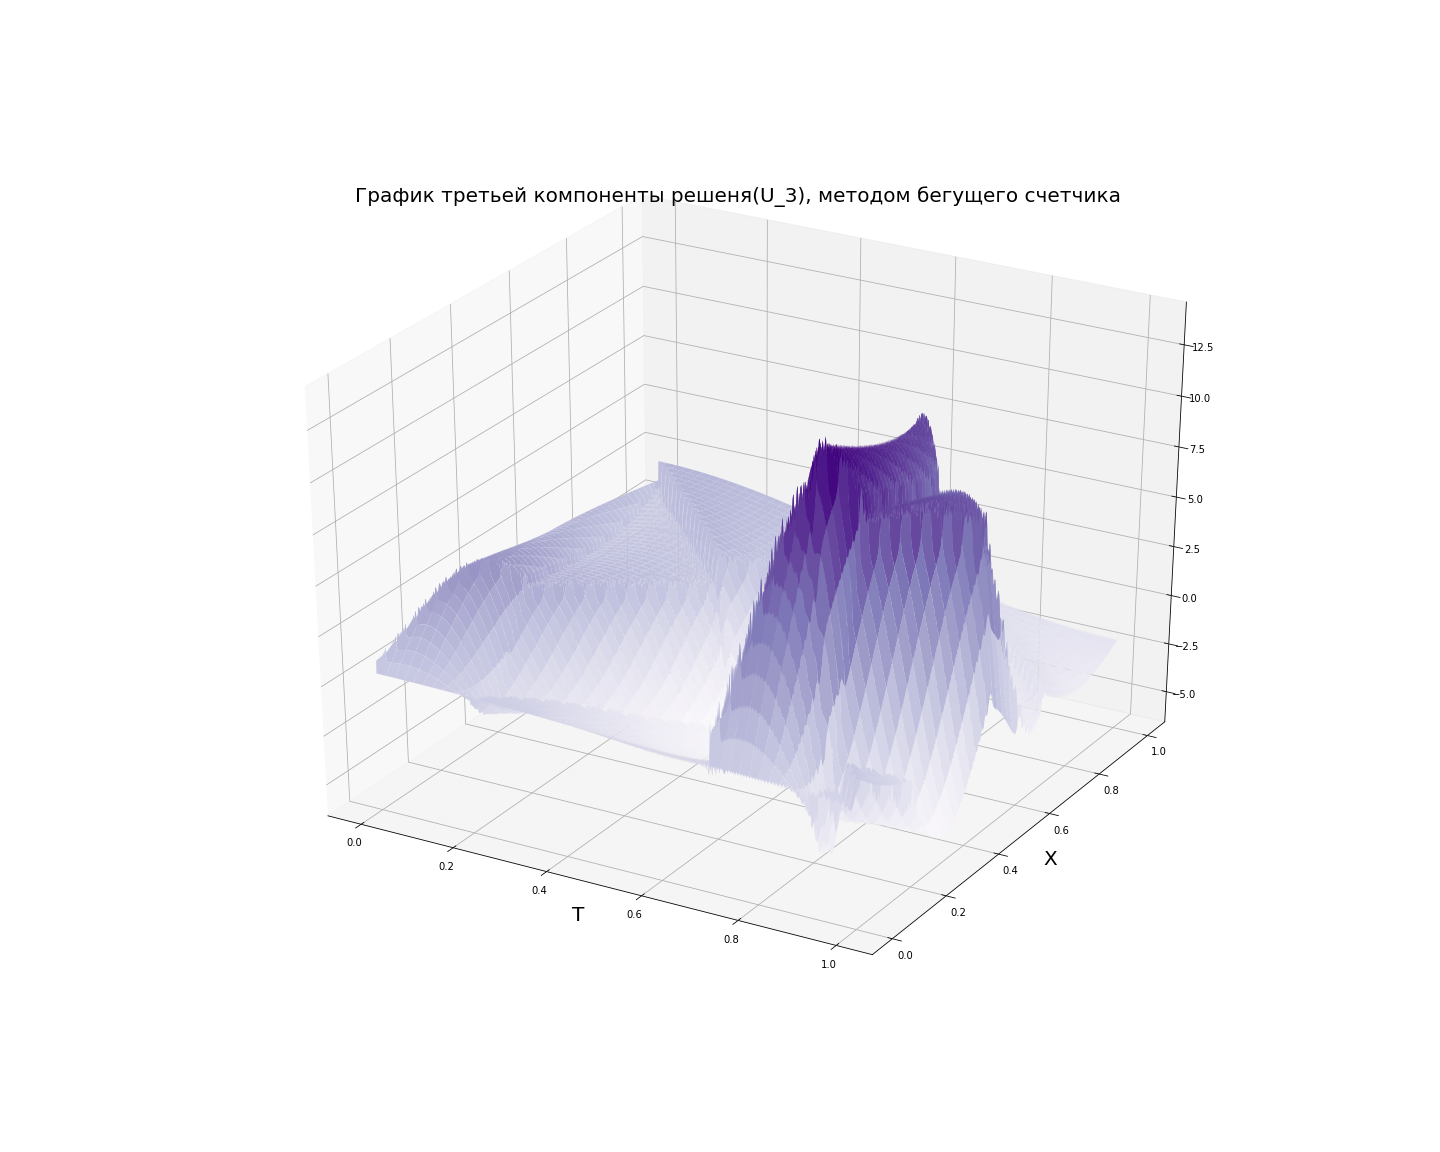

In [10]:
im3

## Оценка апостериорной погрешности 
Для оценки апостериорной погрешности, нам нужно знать точное решение. Прмим в качестве точного решения решение, вычисленное с помощью характеристики. В качестве нормы возьмем максимум различия различия между точным решением и численыым. Кроме того, построим график зависимости логорифма ошибки от логарифма длины шага, и по его наклону вычислим апостериорный порядок сходимости.
 
### Для схемы Лакса
Апостериорный порядок сходимости первой компоненты решения:
$$O( h^{0,0027} + \tau^{0,026}) $$
Апостериорный порядок сходимости второй компоненты решения:
$$O( h^{0,0054} + \tau^{0,028}) $$
Апостериорный порядок сходимости третьей компоненты решения:
$$O( h^{0,0043} + \tau^{0,014}) $$


In [11]:
im1t = Image.open('errs1t.png')
im1x = Image.open('errs1x.png')

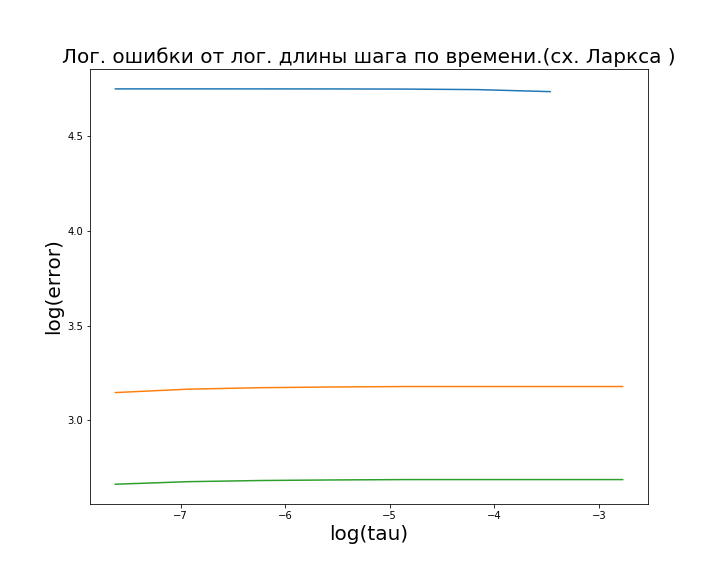

In [12]:
im1t

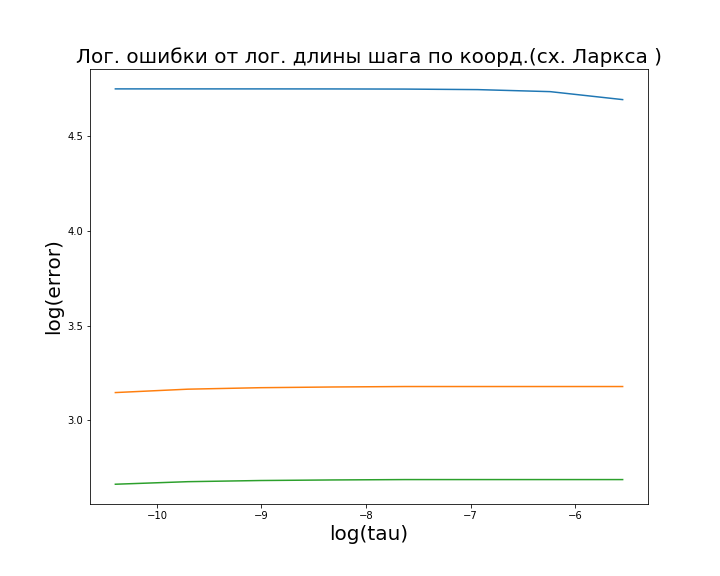

In [13]:
im1x

### Для метода бегущего счетчика
Апостериорный порядок сходимости первой компоненты решения:
$$O( h^{0,053} + \tau^{0,0054}) $$
Апостериорный порядок сходимости второй компоненты решения:
$$O( h^{0,0444} + \tau^{0,0104}) $$
Апостериорный порядок сходимости третьей компоненты решения:
$$O( h^{0,019} + \tau^{0,0078}) $$

Для убедительности приведем график:

In [16]:
im2t = Image.open('errs2t.png')
im2x = Image.open('errs2x.png')

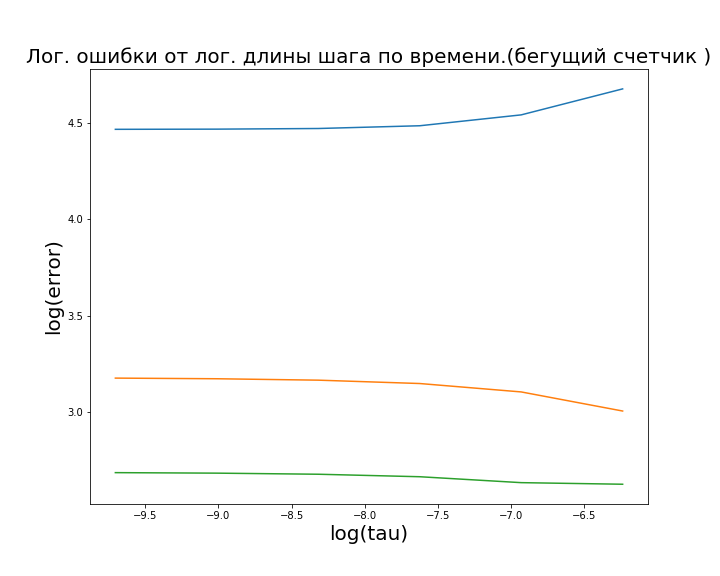

In [17]:
im2t

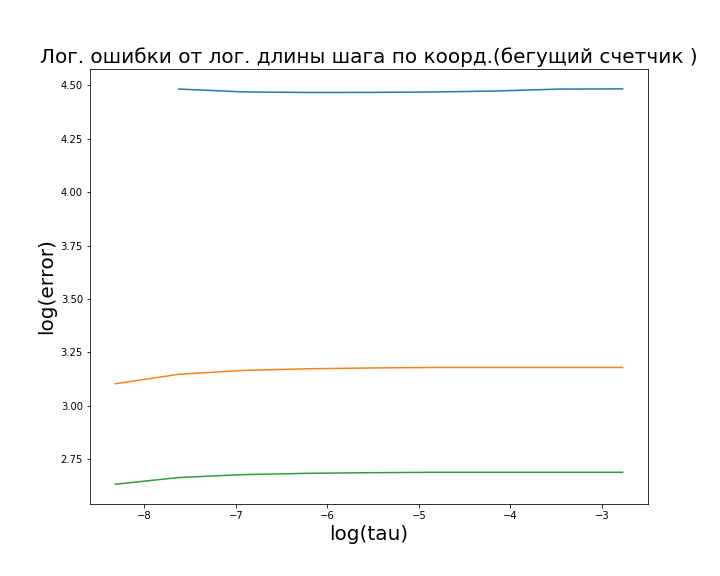

In [18]:
im2x

## Результаты и выводы
В ходе работы было исследовано две схемы решений уравнений гиперболического типа: схема Лакса и схема бегущего счетчика. Сравнение производилось по следующим признакам: априорный порядок сходимости, апостериорный порядок сходимости, монотонность и преобладание диссипативноной или дисперсионной ошибки. Результаты представим в таблице: 


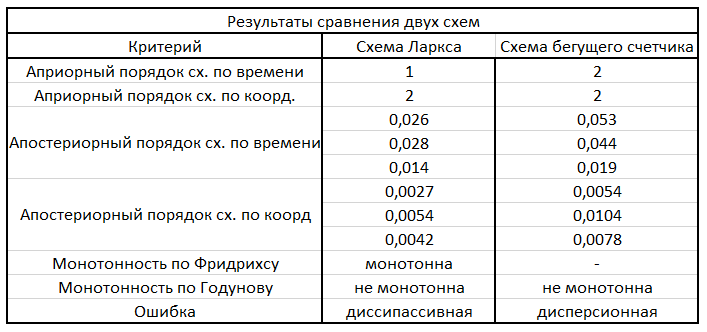

In [19]:
res = Image.open('result.png')
res